# Tree Based Models for Classification and Regression 

In [78]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings 
import seaborn as sns

warnings.filterwarnings('ignore')

from sklearn.datasets import load_breast_cancer


## Classification-Tree

Sequence of if-else questions about individual features

**Objective**: infer class labels

Trees are able to capture non linear relationships between features and labels

Trees dont require feature scaling (standardiwation, normalization...)

A **decision region** is a region in the feature space where all instances are assigned to one class label. These decision regions are separated by **decision boundaries**

A decision tree provides rectangular decision regions in the feature space.

In [80]:
breast_cancer_data=load_breast_cancer(as_frame=True)
X = breast_cancer_data['data']
y = breast_cancer_data['target']

In [81]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [82]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

dt = DecisionTreeClassifier(max_depth=2, random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

0.9298245614035088

## Classification Tree Learning

A **decision tree** is a data structure consisting of a hierarchy of **nodes**. A **node** is a question or a prediction. 

There are three kinds of nodes: 
- **Root**: it has no parent node, and contains a question giving rise to two children nodes.
- **Internal node**: has one parent node, and contains a question giving rise to two children nodes.
- **Leaf**: has one parent node and no children -> prediction

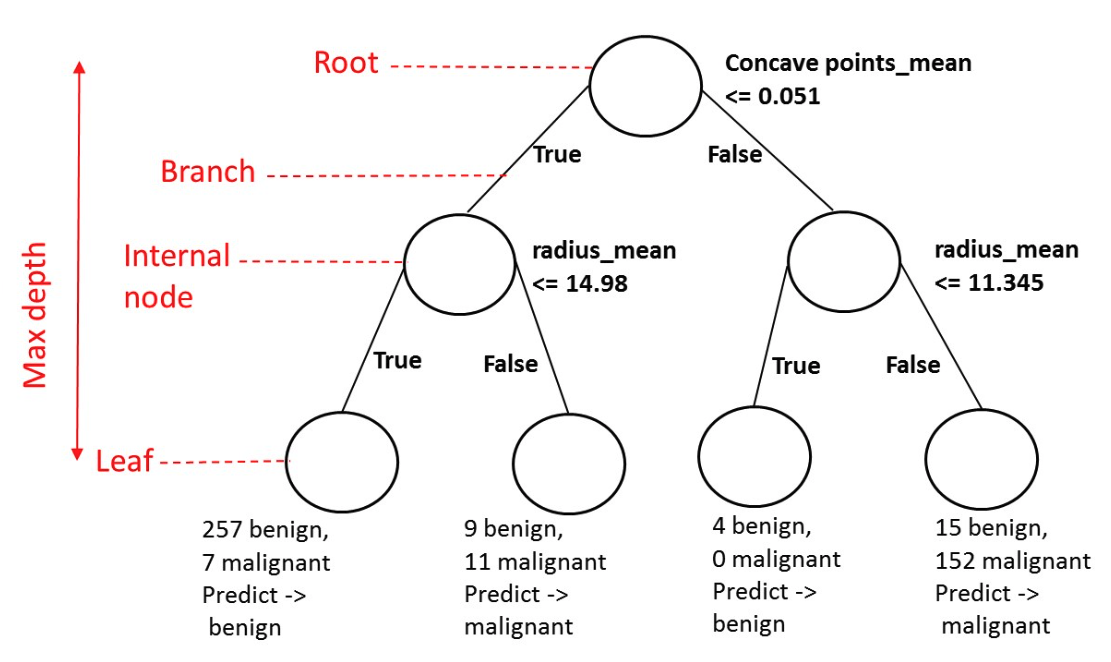


### **Splitting Criteria**
To decide the best way to split the data at each node, Decision Trees use criteria like **Gini impurity** or **Entropy**. These criteria measure how well a feature separates the data into distinct classes.

#### Gini Impurity
- **Gini Impurity** measures the probability of incorrectly classifying a randomly chosen element if it were randomly labeled according to the distribution of labels in the subset.
- Formula:
$$
  \text{Gini}(S) = 1 - \sum_{i=1}^{C} p_i^2
$$
  where \(p_i\) is the proportion of elements belonging to class \(i\) in the dataset \(S\), and \(C\) is the total number of classes.

- **Interpretation**: Gini impurity ranges from 0 (pure) to 0.5 (maximum impurity in a binary classification). The lower the Gini, the better the split.

#### Entropy
- **Entropy** is a measure of the disorder or uncertainty in the dataset.
- Formula:
$$
  \text{Entropy}(S) = - \sum_{i=1}^{C} p_i \log_2(p_i)
$$
  where \(p_i\) is the proportion of elements in class \(i\).

- **Interpretation**: Entropy is 0 when the dataset is perfectly pure (all elements belong to a single class) and increases as the classes become more mixed.

### **Information Gain**
- **Information Gain** measures the reduction in entropy or Gini impurity after a dataset is split on an attribute. It is used to select the feature that results in the best split.
- Formula:
$$
  \text{Information Gain}(S, A) = \text{Entropy}(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} \times \text{Entropy}(S_v)
$$
  where:
  - \(S\) is the original dataset.
  - \(A\) is the attribute on which we split.
  - \(S_v\) is the subset of \(S\) where the attribute \(A\) has value \(v\).

- **Interpretation**: The attribute with the highest information gain is chosen for the split.

## Learning Process of Decision Trees

The learning process of a decision tree can be broken down into the following steps:

### 1. **Selecting the Best Feature**
- At each node, evaluate all possible features using the splitting criteria (Gini or Entropy).
- Calculate the Information Gain for each feature.
- Choose the feature with the highest Information Gain.

### 2. **Splitting the Dataset**
- Split the dataset into subsets based on the selected feature.
- Each subset corresponds to a branch of the tree.

### 3. **Recursion**
- Recursively apply the above steps to each subset.
- Continue the process until one of the following stopping conditions is met:
  - All instances in a subset belong to the same class (pure node).
  - Maximum tree depth is reached.
  - Minimum number of samples in a node is reached.

### 4. **Pruning (Optional)**
- Pruning involves cutting down parts of the tree that add little predictive power, reducing overfitting and improving generalization.
- **Pre-pruning**: Stopping the tree-building process early based on certain conditions (e.g., max depth, min samples per leaf).
- **Post-pruning**: Removing branches after the tree has been built based on performance on a validation set.

In [83]:
#dt = DecisionTreeClassifier(criterion='gini', random_state=1)
dt = DecisionTreeClassifier(criterion='entropy', random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

0.9649122807017544

## Decision Trees for Regression


In [84]:
cars = pd.read_csv('../data/Auto.csv')
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

<Axes: xlabel='displacement', ylabel='mpg'>

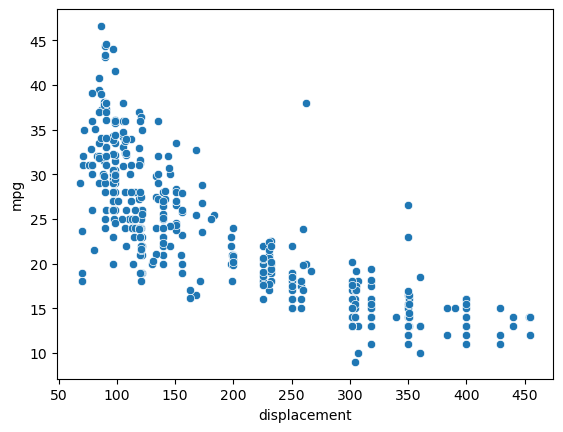

In [85]:
sns.scatterplot(data=cars, x='displacement', y='mpg')

In [86]:
X = cars[['displacement']]
y = cars['mpg'].values.reshape(-1, 1)

In [87]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

mse_dt = MSE(y_test, y_pred)

rmse_dt = mse_dt**(1/2)

print(rmse_dt)

4.037188798144442


## Generalization Error 

When trying to approximate the target function, there are 2 main problems that have to be tackled: 
- **Overfitting**: the approximated function fits the training set noise
- **Underfitting**: the approximated function is not flexible enough to approximate the target function.

The generalization error of a model tells us how well it generalizes on unseen data.

The generalization error of a model can be decomposed as follows: 

$$\text{Generalization error of }\hat{f}(x) = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}$$

**Bias**: error term that tells on average how much $$\hat{f} \neq f$$
High bias models tend to underfitting

**Variance**: how much $\hat{f}(x)$ is inconsistent over different training sets

**Model Complexity** sets the flexibility of $\hat{f}(x)$. The max depth, minimum samples per leaf, etc are examples.

### The bias variance trade-off
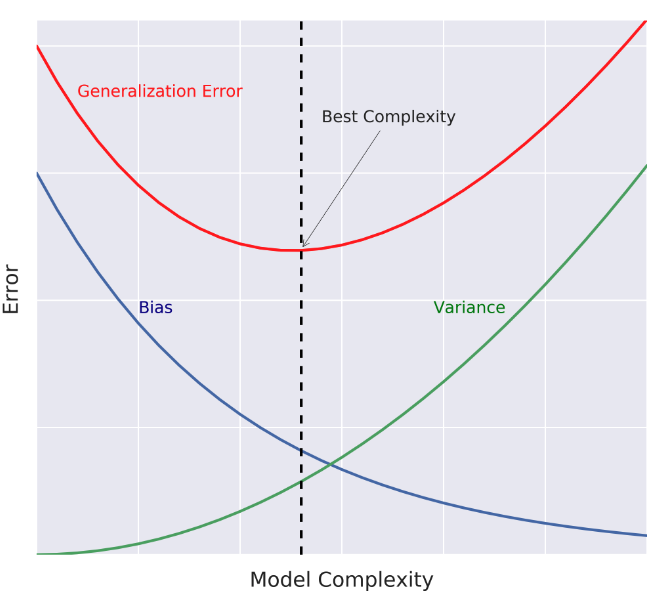

## Diagnosing Bias and Variance Problems

### Estimating the generalization error 

We can use the test set to estimate it. The test set should not be used until we are confident about f's performance.

If we use the training set to estimate the generalization error, this estimation would be biased since $\hat{f}(x)$ has already seen those datapoints.

Cross-Validation (CV) is the solution to these problems.

2 variations: hold out CV or k fold CV

In K-Fold CV, whe split the data into K folds. We train on K-1 folds and evaluate the trained model in the left fold. We do that K times, once per fold. At the end we end up with K validation errors. The average of them is the CV error.

> If cv error of $\hat{f}(x)$ > training error of $\hat{f}(x)$ -> **High variance**

If $\hat{f}(x)$ has high variance, $\hat{f}(x)$ is said to overfit the training set. Possible solutions are: 
- Reduce model complexity
- Gather more data

> If cv error of $\hat{f}(x)$ \approx training error of $\hat{f}(x)$ and both are greater than the desired error -> **High bias**

If $\hat{f}(x)$ has high bias, $\hat{f}(x)$ is said to underfit the training set. Possible solutions are: 
- Increase model complexity
- Gather more relevant features


In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import cross_val_score

cars = pd.read_csv('../data/Auto.csv')

X = cars[['displacement']]
y = cars['mpg'].values.reshape(-1, 1)

SEED=42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.14, random_state=SEED)

MSE_CV = - cross_val_score(dt, X_train, y_train, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

In [89]:
dt.fit(X_train, y_train)

y_predict_train = dt.predict(X_train)
y_predict_test = dt.predict(X_test)

In [90]:
print(f'CV MSE: {MSE_CV.mean()}')
print(f'Train MSE: {MSE(y_train, y_predict_train)}')
print(f'Test MSE: {MSE(y_test, y_predict_test)}')

CV MSE: 18.510244465741643
Train MSE: 17.610476132201253
Test MSE: 20.473902611660822


## Ensemble Learning

Classification and Regression Trees have several limitations: 
- Can only produce orthogonal decission boundaries when performing classification
- They are sensitive to small variations in te training set
- High variance: unconstrained CARTs may overfit the training set

The solution to many of these problems is **ensemble learning**

Ensemble learning trains different models on the same dataset

Let each model make its predictions 

The **meta-model** aggregates predictions of individual models and outputs a final prediction

The final prediction is more robust and less prone to errors than each individual model

Best results are obtained when the small models are skillful in different ways

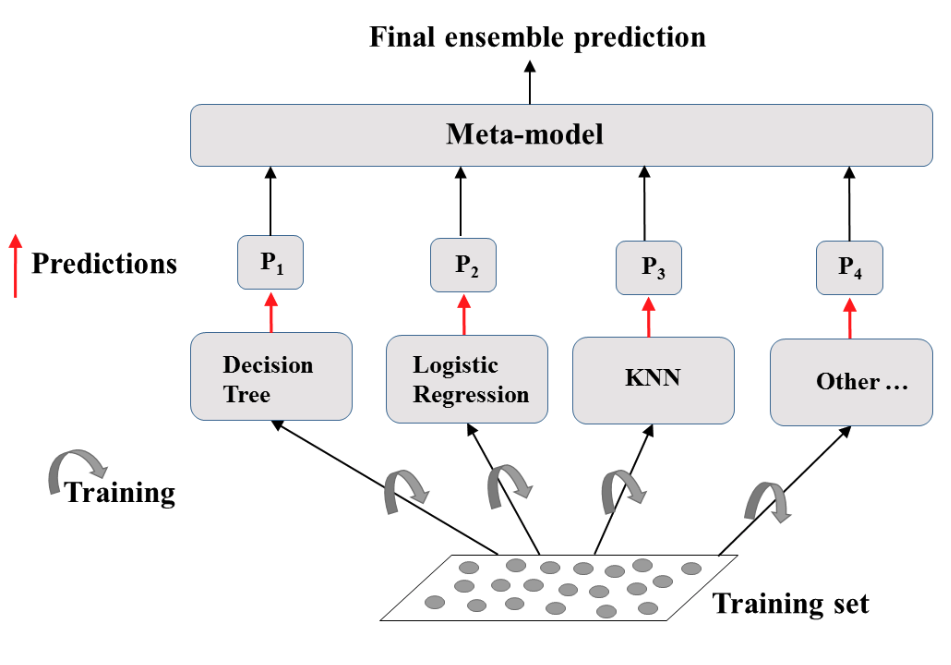

An example of classification metamodel is the hard voting, where the most voted class is the one being outputed.

In [92]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

SEED=1

breast_cancer_data=load_breast_cancer(as_frame=True)
X = breast_cancer_data['data']
y = breast_cancer_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

lr = LogisticRegression(random_state=SEED)
knn=KNN()
dt=DecisionTreeClassifier(random_state=SEED)

classifiers=[
    ('lr', lr),
    ('knn', knn),
    ('dt', dt)
]

for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print (f' accuracy of {clf_name}: {accuracy_score(y_test, y_pred)}')

 accuracy of lr: 0.956140350877193
 accuracy of knn: 0.956140350877193
 accuracy of dt: 0.9649122807017544


In [93]:
vc = VotingClassifier(estimators=classifiers)

vc.fit(X_train, y_train)
y_pred = vc.predict(X_test)

print (f' accuracy of Voting Classifier: {accuracy_score(y_test, y_pred)}')

 accuracy of Voting Classifier: 0.9649122807017544


> This should work better on the breast cancer dataset

## Bagging

The bagging technique is an ensemble learning method that uses a single algorithm, but trains it on different subsets of the data. Bagging stands for bootstrap aggregation.

Bagging reduces the variance of individual models in the ensemble

The meta model aggregates predictions by majority voting in classification problems and through averaging when performing regression.


In [96]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

SEED=1

breast_cancer_data=load_breast_cancer(as_frame=True)
X = breast_cancer_data['data']
y = breast_cancer_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

dt=DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.1, random_state=SEED)

bc = BaggingClassifier(estimator=dt, n_estimators=300, n_jobs=-1)

bc.fit(X_train, y_train)

y_pred = bc.predict(X_test)

print (f' accuracy of {clf_name}: {accuracy_score(y_test, y_pred)}')

 accuracy of dt: 0.9298245614035088


### Out of bag evaluation 

During bagging, some samples can be drawn multiple times, whilst some others none at all. On average, for each model, 63% of the training instances are sampled. The remaining 37% consitute the Out Of Bag instances (OOB)

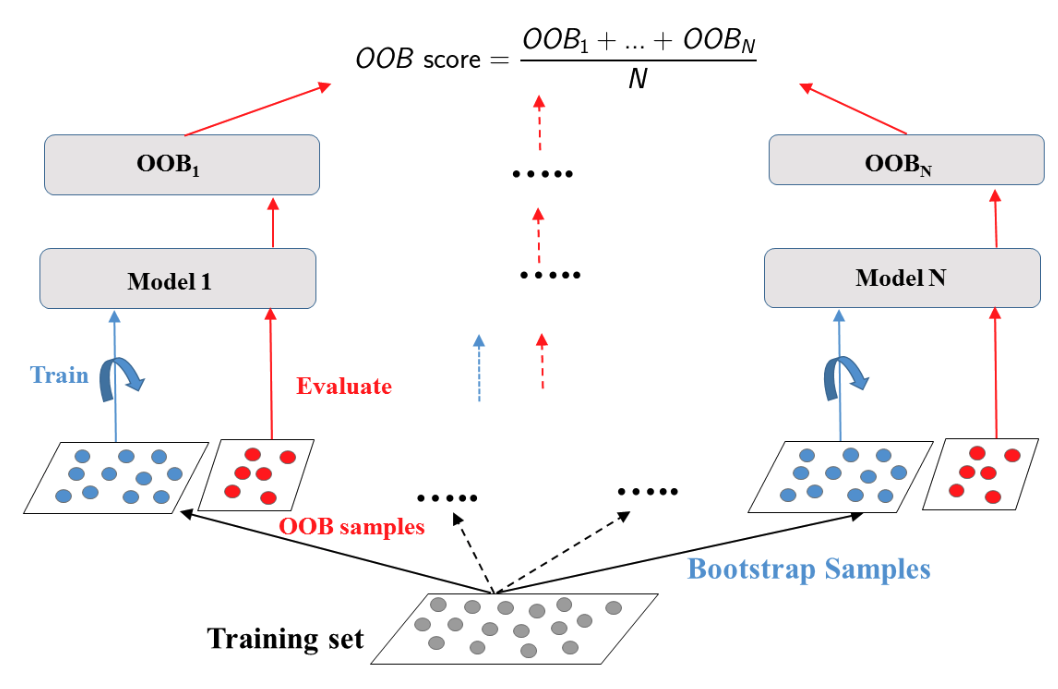




In [98]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

SEED=1

breast_cancer_data=load_breast_cancer(as_frame=True)
X = breast_cancer_data['data']
y = breast_cancer_data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=1)

dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.16, random_state=SEED)

bc = BaggingClassifier(estimator=dt, n_estimators=300, n_jobs=-1, oob_score=True)

bc.fit(X_train, y_train)

y_pred = bc.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
oob_accuracy = bc.oob_score_

print (f'test accuracy of {clf_name}: {test_accuracy}')
print (f'oob accuracy of {clf_name}: {oob_accuracy}')

test accuracy of dt: 0.935672514619883
oob accuracy of dt: 0.9221105527638191


The oob accuracy is a nice way to measure the performance of the model on unseen data without performing cross validation

## Random Forests

Random Forests is an ensemble method that uses decision tree as the base estimator.

Each estimator is trined on a different bootstrap sample having the same size as the training set. 

Random Forest introduces further randomization in the training of individual trees

d features are sampled at each node without replacement, where d < total number of features.

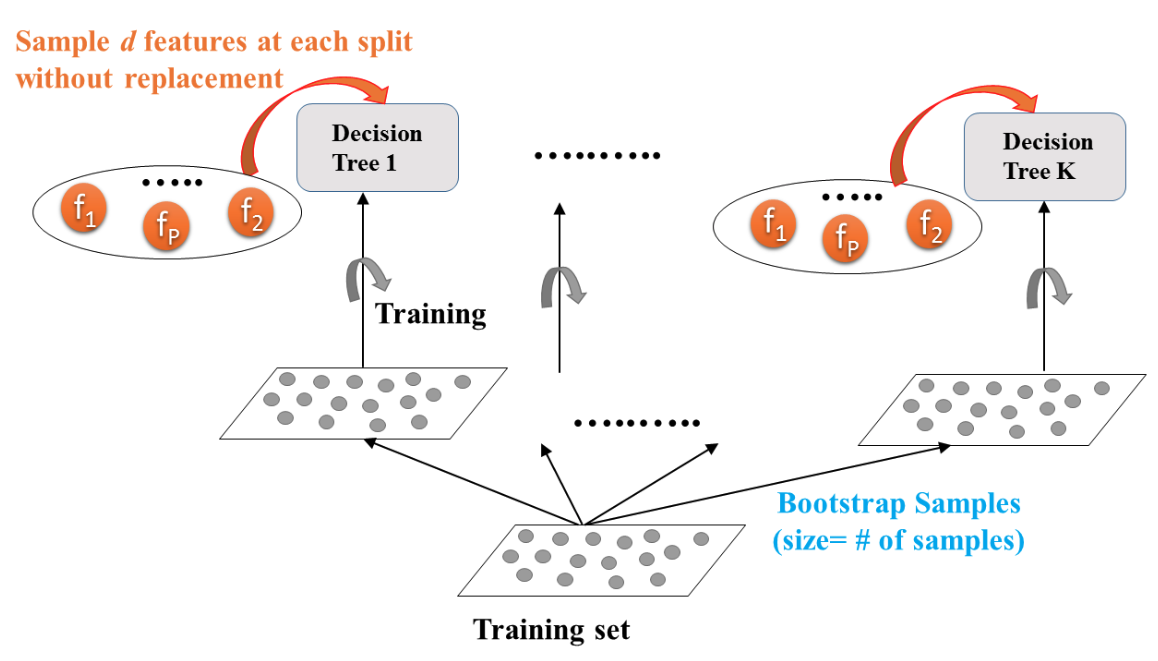

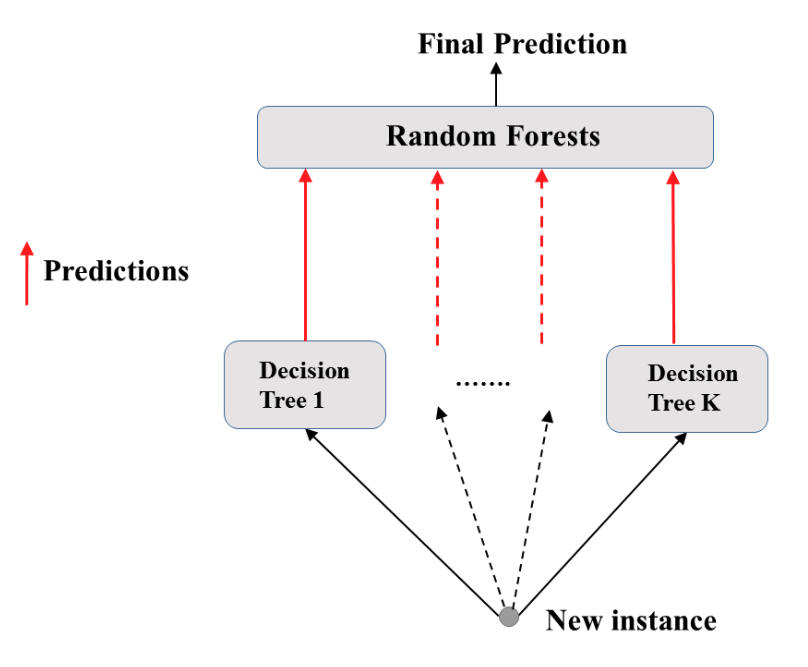

The meta model aggregates predictions by majority voting in classification problems and through averaging when performing regression.


In [106]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

SEED=1

cars = pd.read_csv('../data/Auto.csv')

X = cars.drop(['mpg', 'name'], axis=1)
y = cars['mpg'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

rf = RandomForestRegressor(n_estimators=400, min_samples_leaf=0.12)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = MSE(y_test, y_pred)
rmse = mse**(1/2)

print (f'rmse: {rmse}')


rmse: 4.26900104457185


Tree based methods enable measuring the importance of each feature in the prediction.

In sklearn the importance is measured as how much the tree nodes use a particular feature (weighted average) to reduce impurity



In [107]:
rf.feature_importances_

array([4.19236582e-01, 2.48591715e-01, 1.60910908e-01, 1.60627766e-01,
       4.52242785e-05, 1.05878041e-02, 0.00000000e+00])

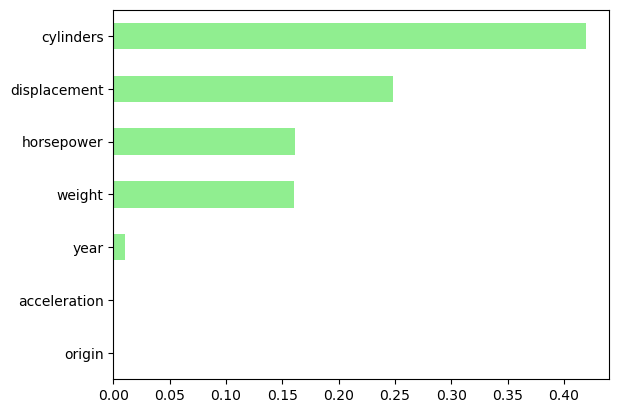

In [109]:
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)
sorted_importances_rf = importances_rf.sort_values()

sorted_importances_rf.plot(kind='barh', color='lightgreen')
plt.show()